In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
warnings.filterwarnings("ignore")
df = pd.read_csv(r".\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.shape

(768, 9)

In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df=df.drop_duplicates()
df.shape

(768, 9)

In [5]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print("______________________")

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
______________________
Glucose
99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64
______________________
BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64
______________________
SkinThickness
0     227
32     31
30    

In [6]:
#Replacing the zero-values for Blood Pressure
df1 = df.loc [df ['Outcome'] == 1]
df2 = df.loc[df ['Outcome'] == 0]

df1 = df1.replace ({ 'BloodPressure': 0}, np.median (df1['BloodPressure']))
df2 = df2.replace ({ 'BloodPressure': 0}, np.median (df2 ['BloodPressure']))
dataframe = [df1, df2]
df = pd.concat (dataframe)

In [7]:
#Replacing the zero-values for Blood Pressure
df1 = df.loc [df ['Outcome'] == 1]
df2 = df.loc[df ['Outcome'] == 0]

df1 = df1.replace ({ 'BMI': 0}, np.median (df1['BMI']))
df2 = df2.replace ({ 'BMI': 0}, np.median (df2 ['BMI']))
dataframe = [df1, df2]
df = pd.concat (dataframe)

Pregnancies
count :  4
88     15
159    17
298    14
455    14
Name: Pregnancies, dtype: int64


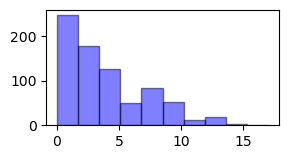

Glucose
count :  5
349    0
502    0
75     0
182    0
342    0
Name: Glucose, dtype: int64


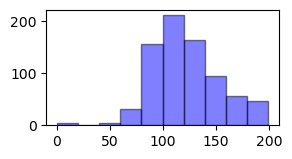

BloodPressure
count :  8
43     110
125     30
177    110
691    114
18      30
106    122
549    110
597     24
Name: BloodPressure, dtype: int64


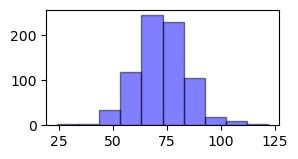

Insulin
count :  22
8      543
13     846
111    495
186    495
220    478
370    465
409    579
415    474
584    600
655    540
695    480
715    392
753    510
153    485
228    744
247    680
248    402
286    545
392    415
486    480
645    440
710    387
Name: Insulin, dtype: int64


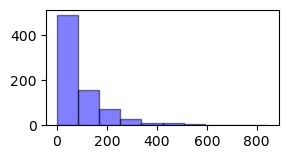

BMI
count :  6
120    53.2
125    55.0
177    67.1
303    52.9
445    59.4
673    57.3
Name: BMI, dtype: float64


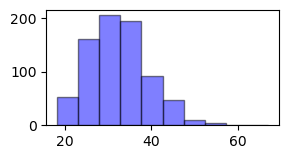

DiabetesPedigreeFunction
count :  17
4      2.288
39     1.390
45     1.893
308    1.391
370    2.137
445    2.420
661    1.394
12     1.441
58     1.781
147    1.400
228    2.329
330    1.476
371    1.731
395    1.600
593    1.699
621    1.698
622    1.461
Name: DiabetesPedigreeFunction, dtype: float64


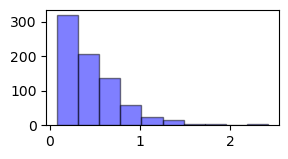

Age
count :  16
221    66
363    67
666    70
759    66
123    69
148    65
294    65
362    65
453    72
459    81
489    67
495    66
537    67
552    66
674    68
684    69
Name: Age, dtype: int64


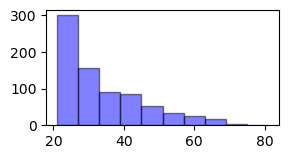

In [8]:
# همه ستون هایی که اوتلایرز داشتند را پیدا میکنیم و نمودارشان هم برای درک بهتر رسم میکنیم
for i in df.columns:
    x=df[i]
    if x[((x-x.median())/x.std()).abs()>3].count()>1:
        print(i) 
        print("count : ",x[((x-x.median())/x.std()).abs()>3].count())
        print(x[((x-x.median())/x.std()).abs()>3])
        plt.figure(figsize=(3, 1.5))
        plt.hist(x, alpha=0.5, color='blue', edgecolor='black')
        plt.show()
        print("===============================")
        

In [9]:
# تمامی ستون هایی که اوتلایرز داشتند را با ماکسیممشان تغییر دادم
handout=['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age']
for i in handout:
    x=df[i]
    max_data = x[((x-x.median())/x.std()).abs()<3].max()
    min_data = x[((x-x.median())/x.std()).abs()<3].min()
    df.loc[df[i] > max_data , i ] = max_data
    df.loc[df[i] < min_data , i ] = min_data
    

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
correlation_matrix=df.corr()
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128744,0.212511,-0.085381,-0.075853,0.027553,-0.019699,0.554825,0.219811
Glucose,0.128744,1.000000,0.226301,0.064236,0.323994,0.229665,0.123123,0.270519,0.481102
BloodPressure,0.212511,0.226301,1.000000,0.013325,-0.051740,0.291125,0.010250,0.333890,0.176097
SkinThickness,-0.085381,0.064236,0.013325,1.000000,0.472064,0.381911,0.177091,-0.112004,0.074752
Insulin,-0.075853,0.323994,-0.051740,0.472064,1.000000,0.192716,0.181282,-0.059299,0.127149
BMI,0.027553,0.229665,0.291125,0.381911,0.192716,1.000000,0.137131,0.038230,0.316328
DiabetesPedigreeFunction,-0.019699,0.123123,0.010250,0.177091,0.181282,0.137131,1.000000,0.046536,0.182624
Age,0.554825,0.270519,0.333890,-0.112004,-0.059299,0.038230,0.046536,1.000000,0.245885
Outcome,0.219811,0.481102,0.176097,0.074752,0.127149,0.316328,0.182624,0.245885,1.000000


In [12]:
from sklearn.feature_selection import chi2
x = df.drop('Outcome', axis=1)
y = df['Outcome']
chi_scores= chi2(x, y)
col = df.columns[:-1]
data = {'Feature Name': col, 'chi_squared': chi_scores[0], 'p_value': chi_scores[1]}
col_chi_P = pd.DataFrame(data)
col_chi_P

,Feature Name,chi_squared,p_value
0,Pregnancies,107.604644,3.281155e-25
1,Glucose,1414.352077,1.598466e-309
2,BloodPressure,46.223732,1.054914e-11
3,SkinThickness,53.108040,3.156977e-13
4,Insulin,1609.141010,0.000000e+00
5,BMI,107.412631,3.614954e-25
6,DiabetesPedigreeFunction,4.901633,2.683131e-02
7,Age,185.215194,3.522243e-42


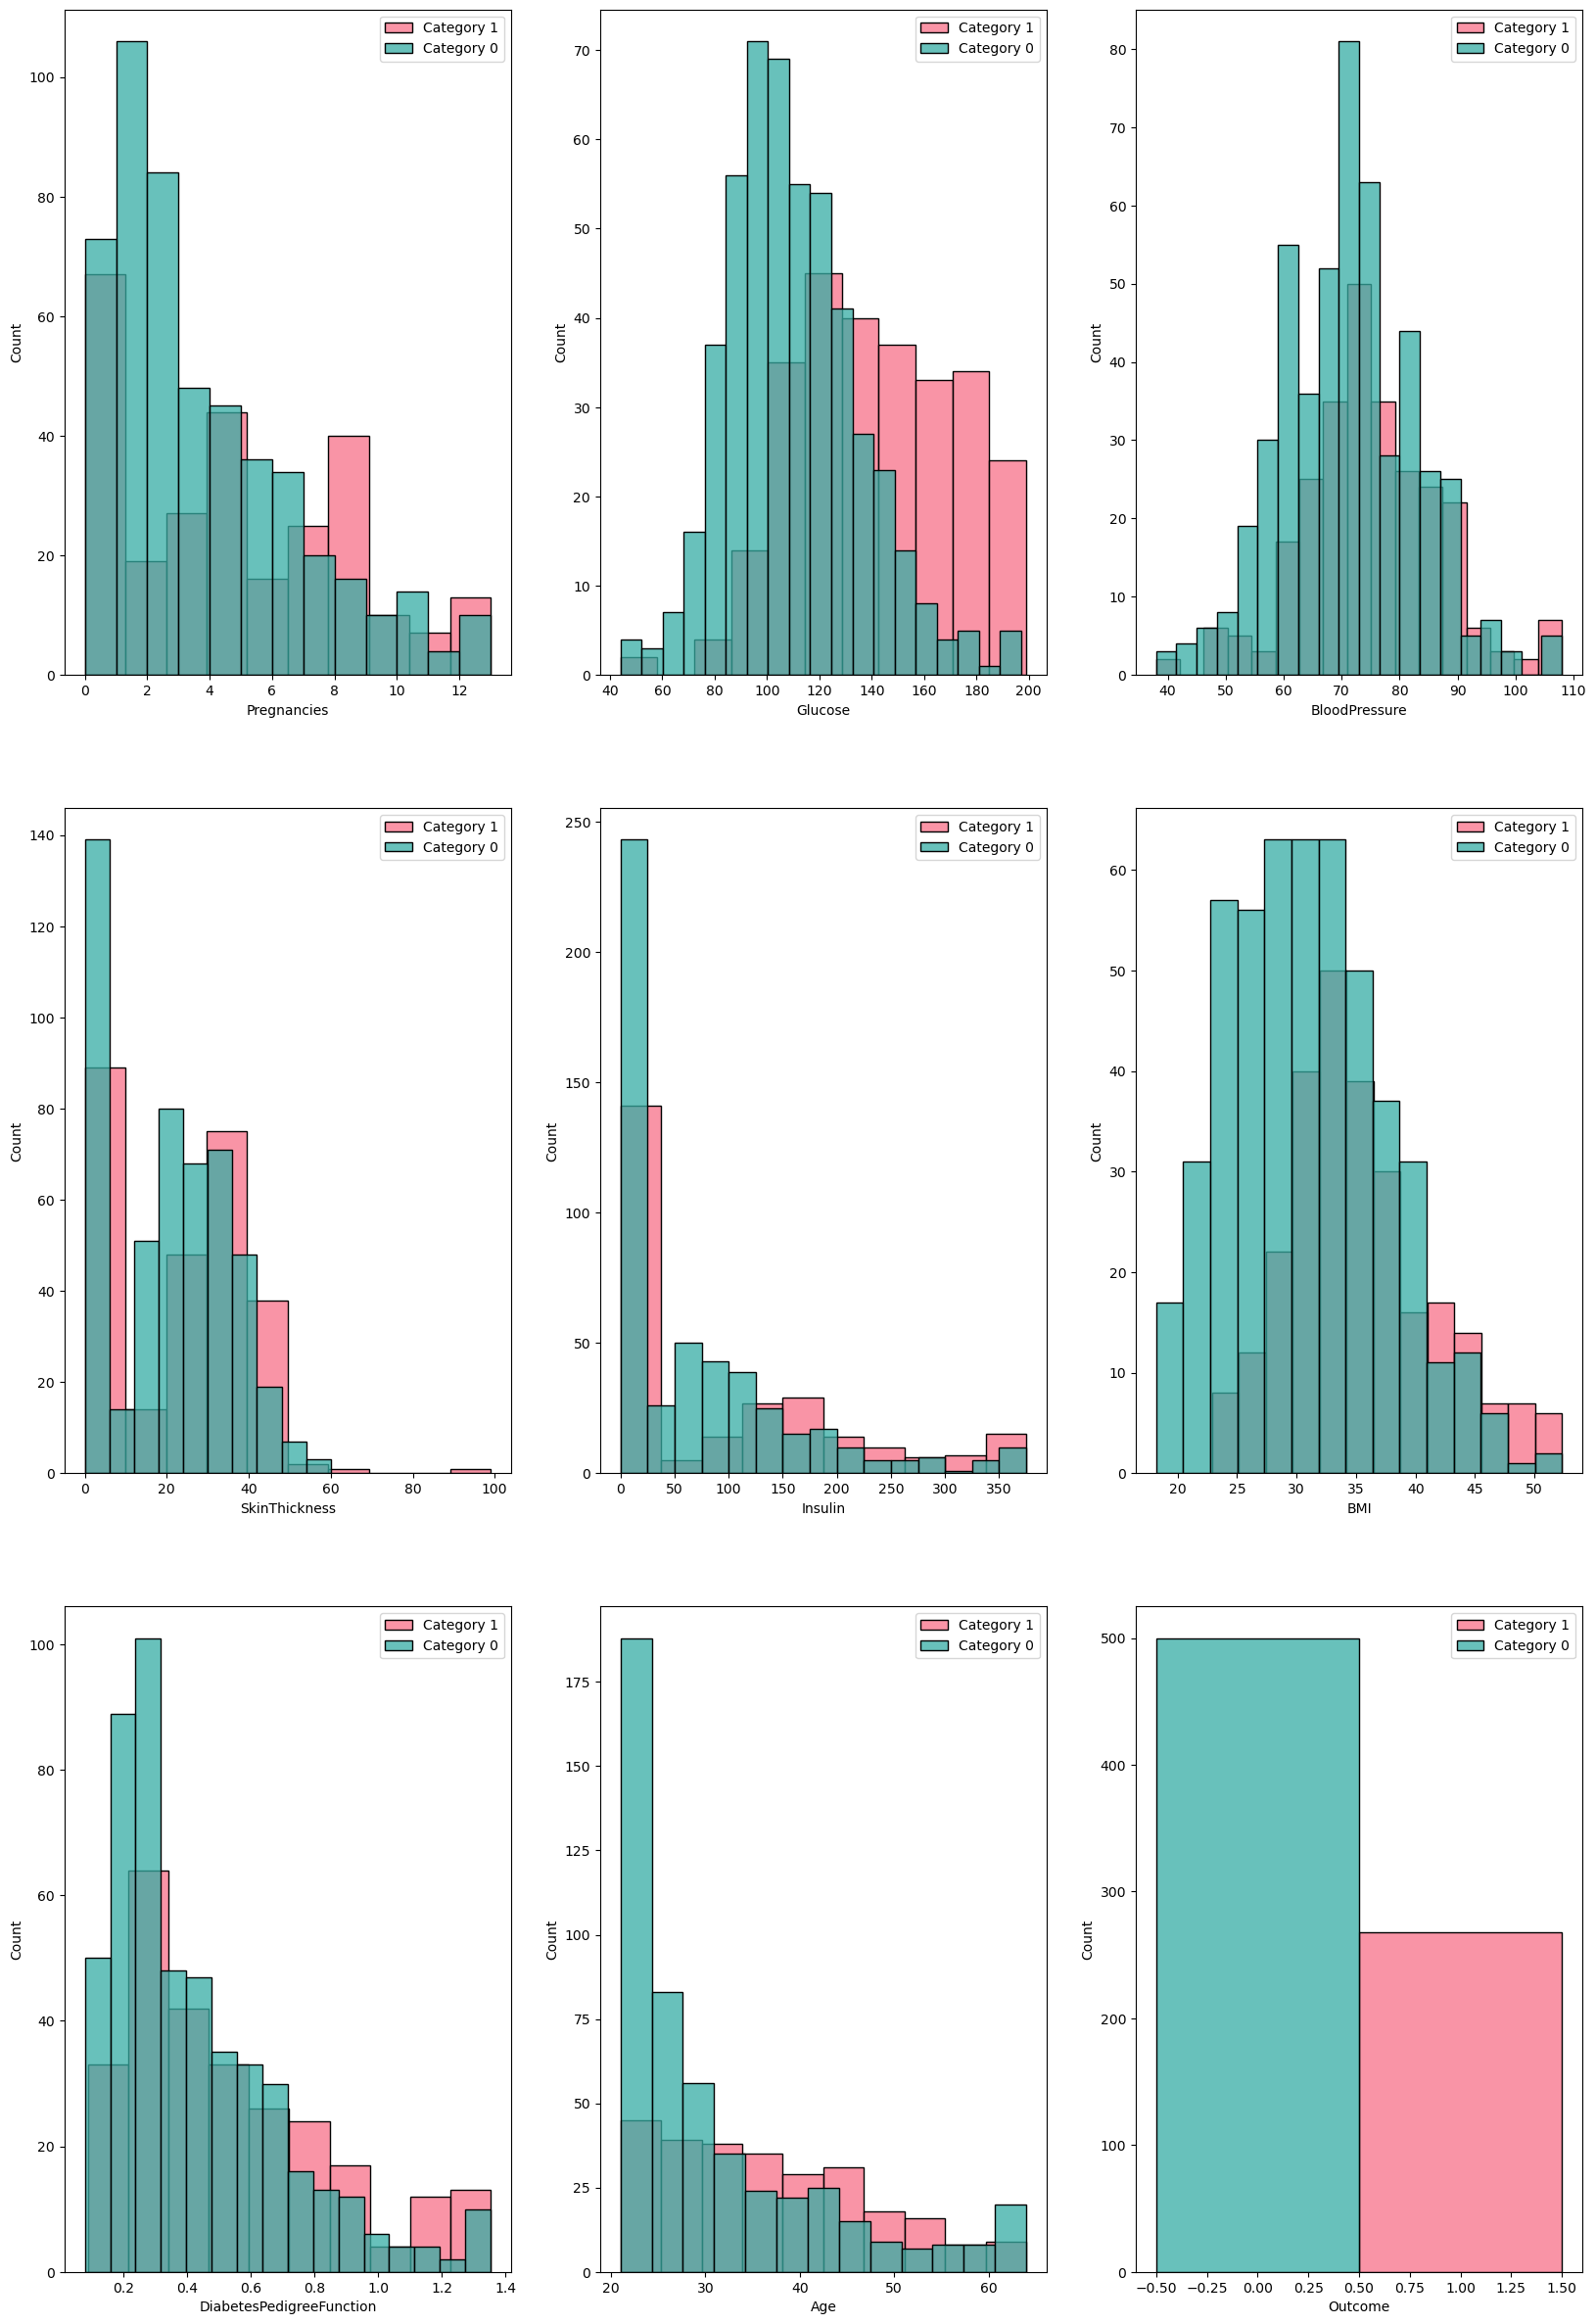

In [13]:
# for idx, column in enumerate(df.columns):
palette = sns.husl_palette(n_colors=len(df['Outcome'].unique()))
fig1 , axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 30))
for idx, column in enumerate(df.columns):
    if idx < 14:  # اجرای تابع تنها برای اندیس‌های معتبر
        for i, category in enumerate(df['Outcome'].unique()):
            sns.histplot(df[df['Outcome'] == category][column], ax=axes[idx // 3, idx % 3], label=f'Category {category}', color=palette[i])
        axes[idx // 3, idx % 3].legend()



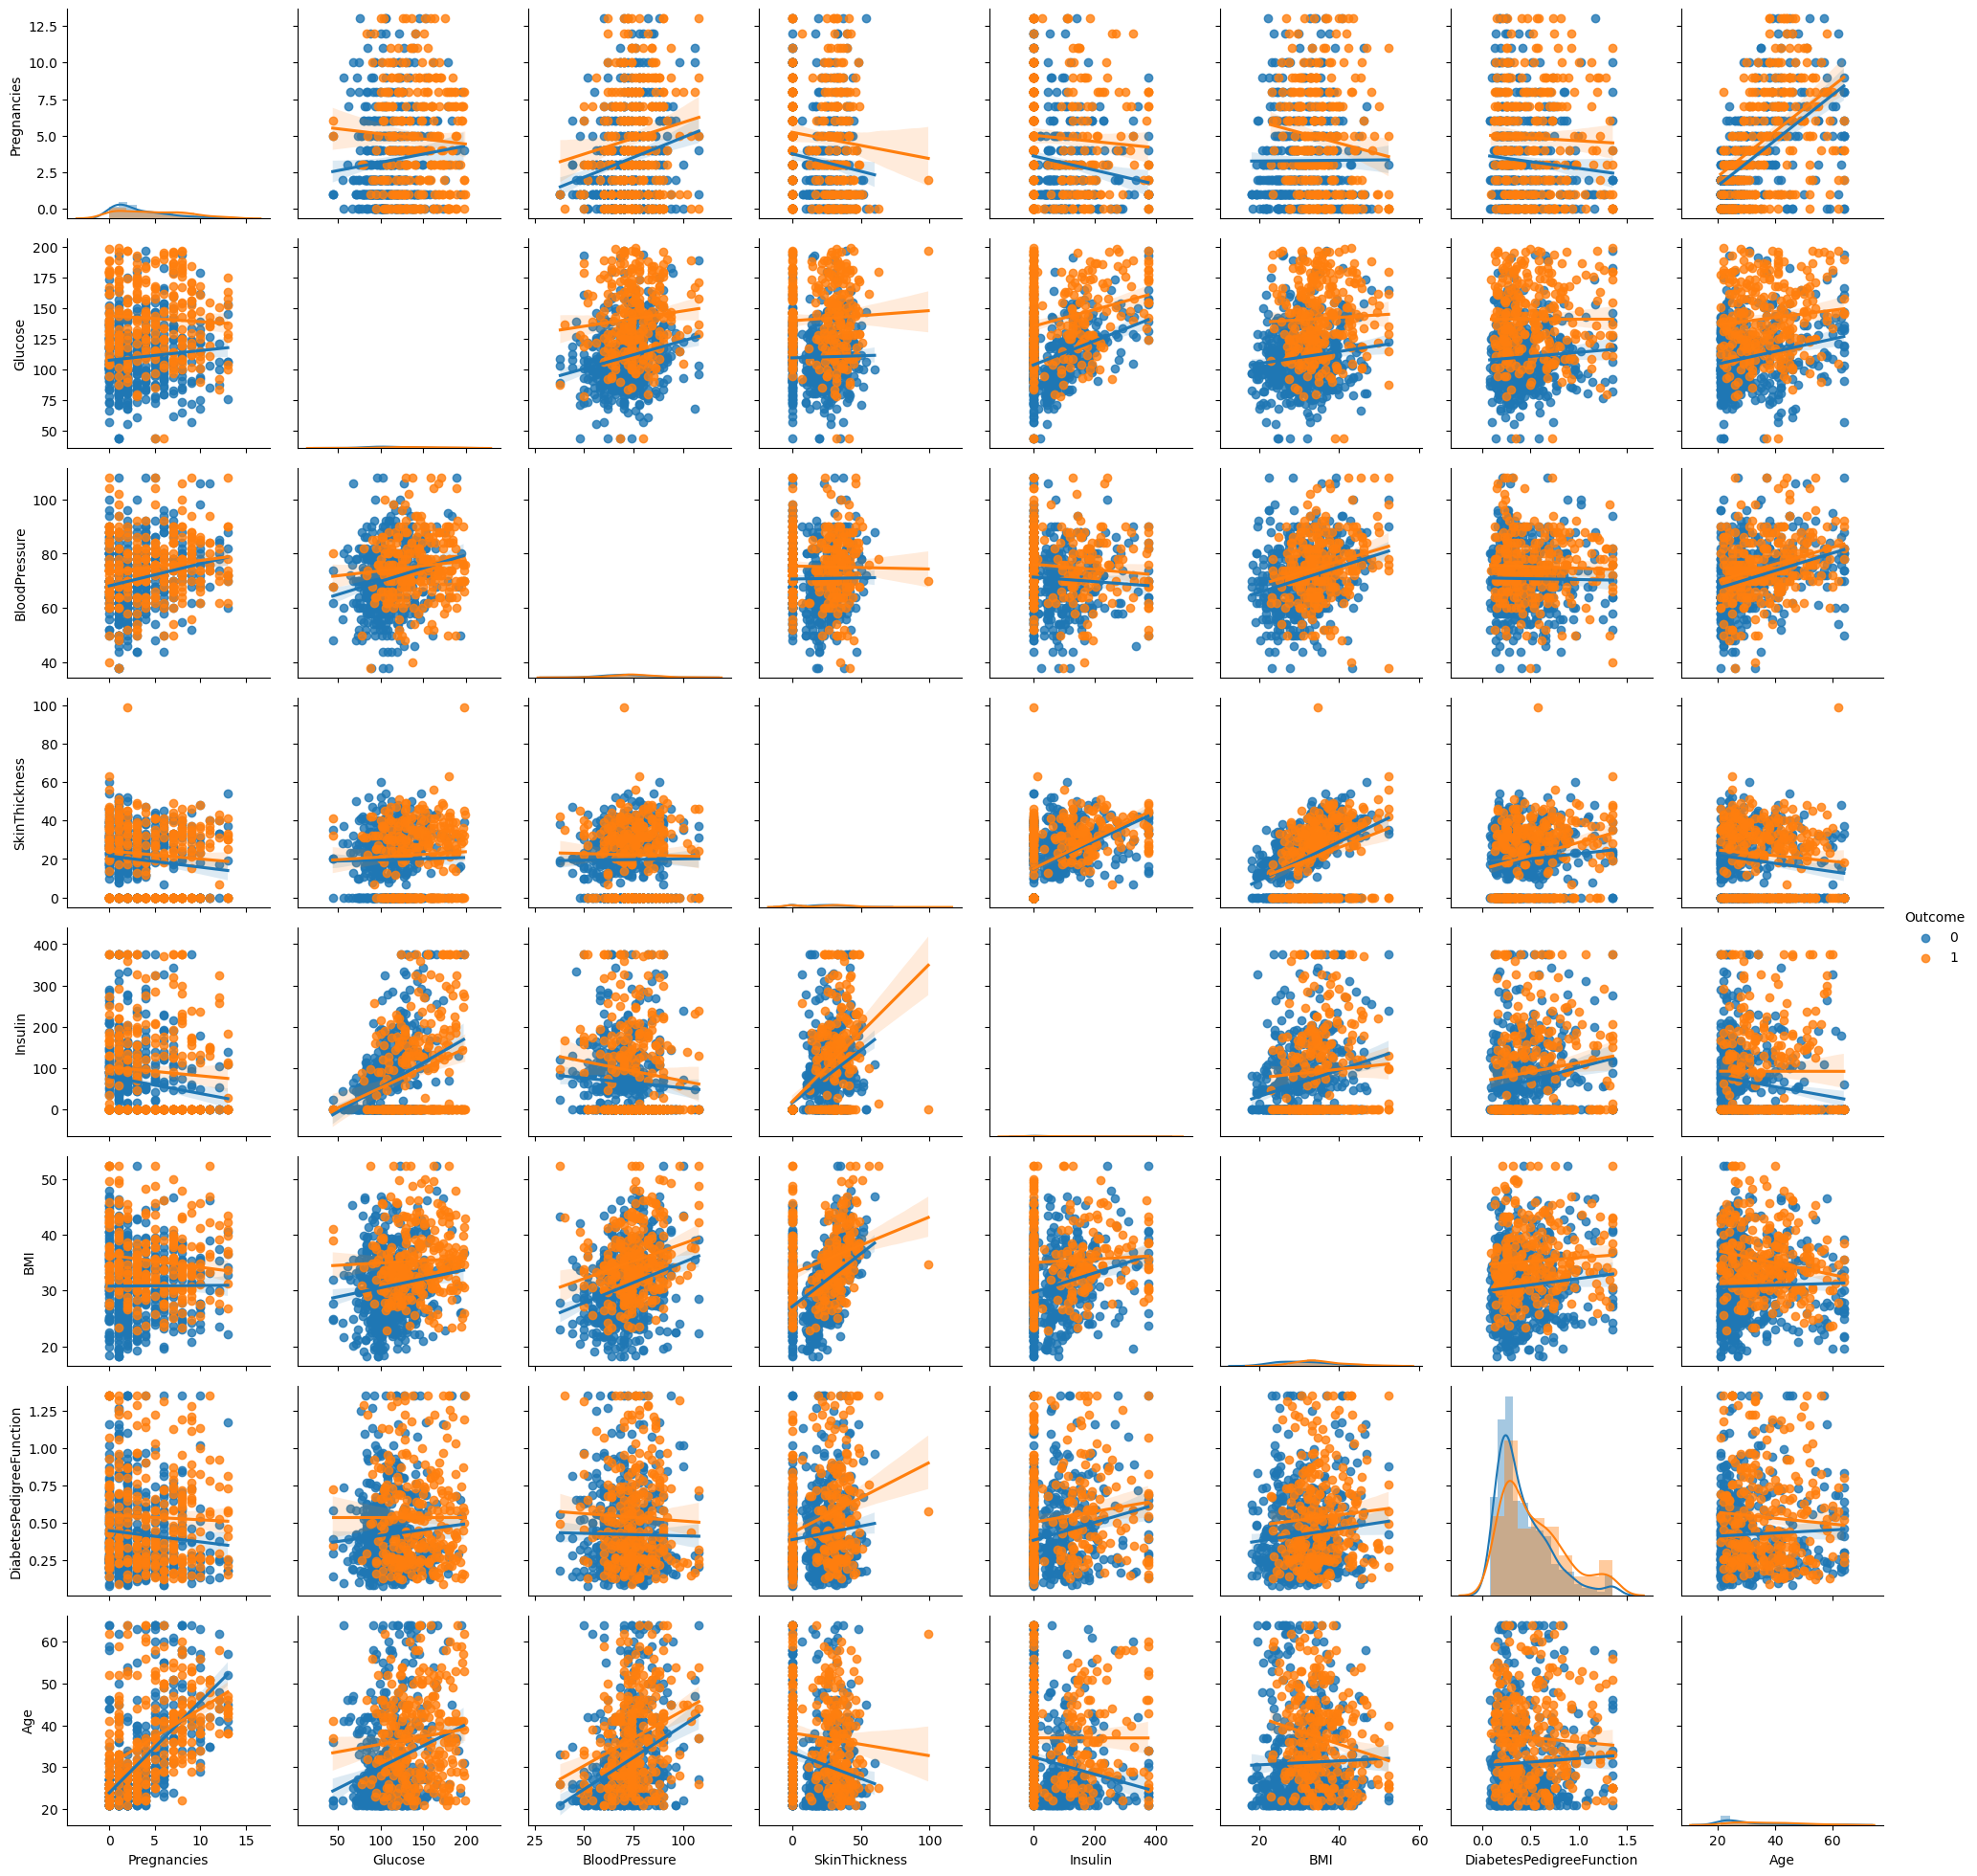

In [14]:
g = sns.PairGrid(df.loc[:, ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
                            'BMI','DiabetesPedigreeFunction','Age','Outcome']] , hue='Outcome')
g = g.map_offdiag(sns.regplot)
g = g.map_diag(sns.distplot)
g = g.add_legend()
plt.show()

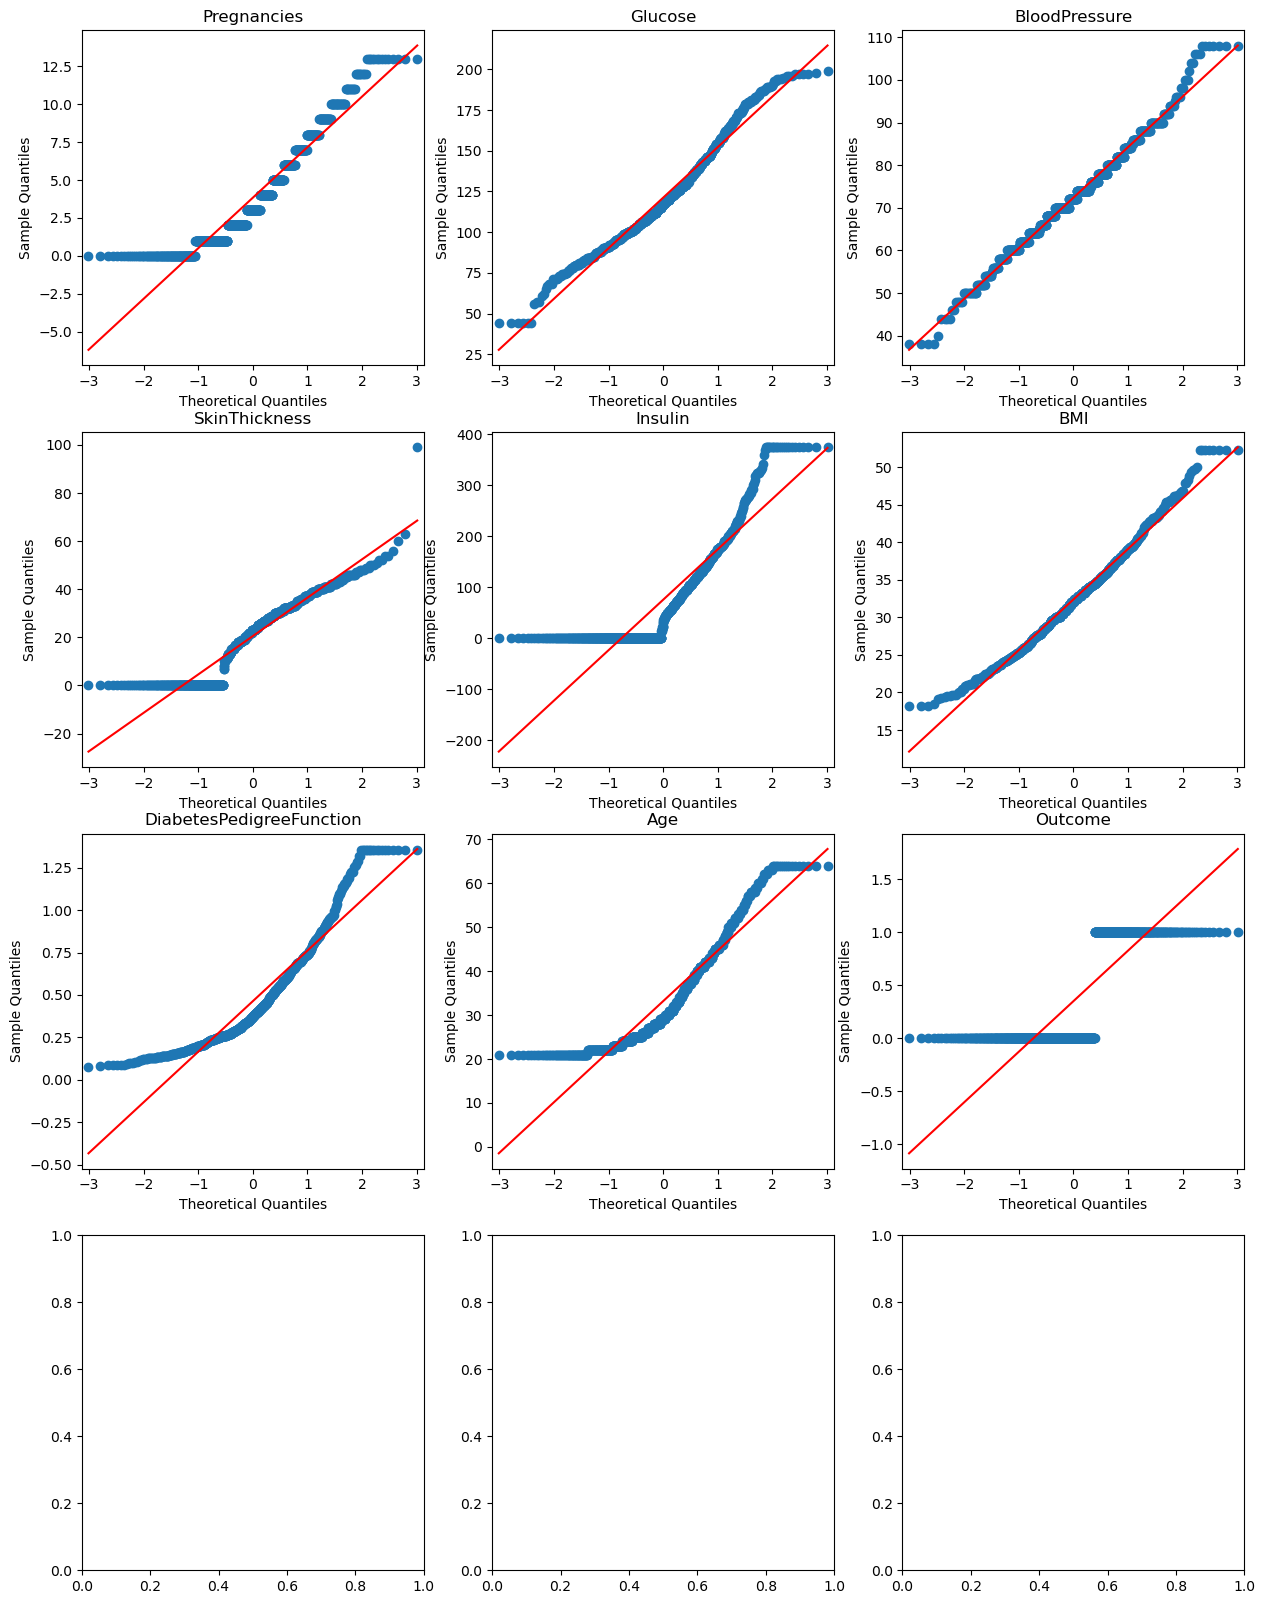

In [15]:
# تعداد ستون‌ها در هر ردیف و ستون نمودارها
num_rows = int(len(df.columns) / 3) + 1

# ایجاد شکل (figure) و محورها (axes) برای نمودارها
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.ravel()

# حلقه برای رسم نمودار Q-Q برای هر ستون
for i, column in enumerate(df.columns):
    ax = axes[i]
    sm.qqplot(df[column], line='s', ax=ax)
    ax.set_title(column)

plt.show()


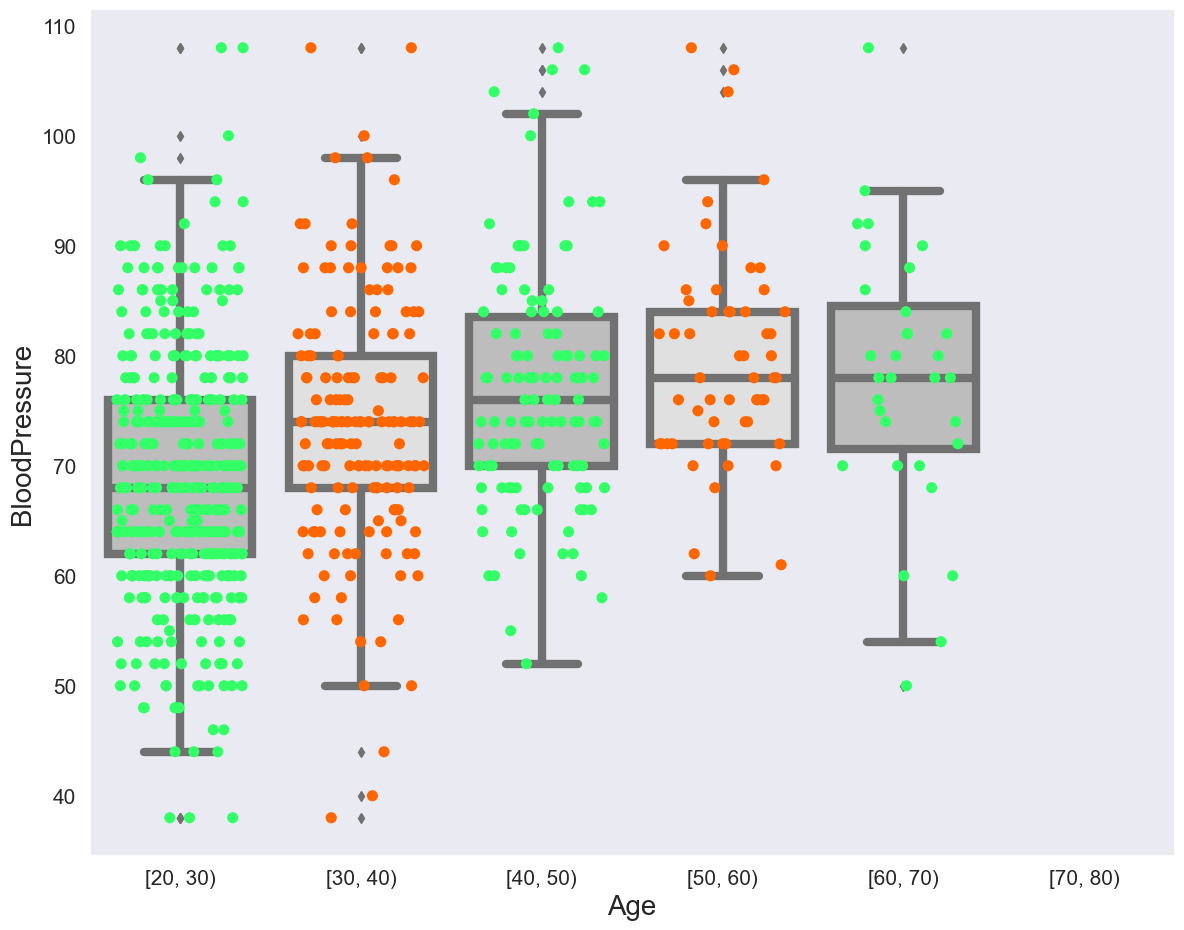

In [16]:
# ایجاد ستون تازه به نام "age_group" برای گروه‌بندی بر اساس سن
df2= pd.cut(df['Age'], bins=range(20, 90, 10), right=False)
plt.figure(figsize=(14,11))
sns.set(rc={"axes.grid":False,
'xtick.labelsize':15,'ytick.labelsize':15,
'axes.labelsize':20,'figure.figsize':(20.0, 9.0)})
params = dict(x = df2 ,y = df['BloodPressure'])
sns.stripplot(**params , size=8,jitter=0.35,palette=['#33FF66','#FF6600'],edgecolor='black')
sns.boxplot(**params ,palette=['#BDBDBD','#E0E0E0'],linewidth=6)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
x = df.drop('Outcome', axis=1)
y = df['Outcome']
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.15, random_state=94)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
print(y_train.value_counts())
print ("\n")
print (y_test.value_counts())

0    428
1    224
Name: Outcome, dtype: int64


0    72
1    44
Name: Outcome, dtype: int64


In [16]:
from imblearn.over_sampling import SMOTE
smt = SMOTE ()
x_train, y_train = smt.fit_resample (x_train, y_train)
np.bincount (y_train)

array([428, 428], dtype=int64)

# DecisionTree

In [17]:
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion='gini' , max_depth=4, min_samples_split=2 ,
                            min_samples_leaf=3 ,class_weight={0:0.4 , 1:0.6})
kf = KFold(5, shuffle=True, random_state=35)
DTCV = cross_val_score(DT, x_train, y_train, cv=kf, scoring='accuracy')
print(DTCV)
DTCV.mean()

[0.76744186 0.73684211 0.65497076 0.79532164 0.74269006]


0.739453284373725

In [18]:
from sklearn.metrics import confusion_matrix
pred = cross_val_predict(DT, x_train, y_train, cv=kf)
confusion_matrix(y_train,pred)

array([[277, 151],
       [ 72, 356]], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score
%time DT.fit(x_train,y_train)
# پیش‌بینی داده‌های تست
y_pred = DT.predict(x_test)
# ارزیابی دقت با استفاده از داده‌های تست
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on test set: ", accuracy_test)

Wall time: 2.41 ms
Accuracy on test set:  0.75


# Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
kf = KFold(5, shuffle=True, random_state=35)
# نایو بیز توزیع گاوسین
GNB = GaussianNB()
GNBCV = cross_val_score(GNB, x, y, cv=kf, scoring='accuracy')
print('accuracy train : ' , GNBCV.mean())
%time GNB.fit(x_train,y_train)
# پیش‌بینی داده‌های تست
y_pred = GNB.predict(x_test)
# ارزیابی دقت با استفاده از داده‌های تست
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on test set: ", accuracy_test)

accuracy train :  0.7486970545794075
Wall time: 0 ns
Accuracy on test set:  0.75


In [21]:
# توزیع چند جمله ای
MNB = MultinomialNB()
scores = cross_val_score(MNB, x_train, y_train, cv=kf, scoring='accuracy')
print('accuracy : ', scores.mean())

accuracy :  0.6004011967904257


# Neural Network

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.model_selection import KFold
MLP = MLPClassifier(max_iter=50,momentum=0.5,activation='relu',alpha=0.01,batch_size=128,hidden_layer_sizes=(64,),
                    learning_rate='invscaling',learning_rate_init=0.05,solver='adam',random_state=42)

kf = KFold(5, shuffle=True, random_state=35)
kfCV = cross_val_score(MLP, x_train, y_train, cv=kf, scoring='accuracy')
print(kfCV)
kfCV.mean()

[0.83139535 0.76608187 0.71929825 0.78362573 0.73099415]


0.7662790697674419

In [23]:
from sklearn.metrics import accuracy_score
%time MLP.fit(x_train,y_train)
# پیش‌بینی داده‌های تست
y_pred = MLP.predict(x_test)
# ارزیابی دقت با استفاده از داده‌های تست
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on test set: ", accuracy_test)

Wall time: 216 ms
Accuracy on test set:  0.75


# SVM

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.model_selection import KFold

SVM = SVC(C=100,degree=2,gamma=0.5,kernel='rbf')
kf = KFold(5, shuffle=True, random_state=35)
SVMCV = cross_val_score(SVM, x_train, y_train, cv=kf, scoring='accuracy')
print(SVMCV)
SVMCV.mean()

[0.8255814  0.77777778 0.76608187 0.79532164 0.74269006]


0.7814905480756155

In [25]:
from sklearn.metrics import accuracy_score
%time SVM.fit(x_train,y_train)
# پیش‌بینی داده‌های تست
y_pred = SVM.predict(x_test)
# ارزیابی دقت با استفاده از داده‌های تست
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on test set: ", accuracy_test)

Wall time: 25.6 ms
Accuracy on test set:  0.7068965517241379


# LogisticRegression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.model_selection import KFold

lr =LogisticRegression(C=10, max_iter=10, penalty='l2',solver='lbfgs')
kf = KFold(5, shuffle=True, random_state=24)
lrCV = cross_val_score(lr, x_train, y_train, cv=kf, scoring='accuracy')
print(lrCV)
lrCV.mean()

[0.6744186  0.77192982 0.73099415 0.78362573 0.78947368]


0.7500883992928056

In [27]:
from sklearn.metrics import accuracy_score
%time lr.fit(x_train,y_train)
# پیش‌بینی داده‌های تست
y_pred = lr.predict(x_test)
# ارزیابی دقت با استفاده از داده‌های تست
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on test set: ", accuracy_test)

Wall time: 13.6 ms
Accuracy on test set:  0.7758620689655172


# RidgeClassifier

In [28]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.model_selection import KFold
RG = RidgeClassifier(alpha=0.3)
kf = KFold(5, shuffle=True, random_state=24)
RGCV = cross_val_score(RG, x_train, y_train, cv=kf, scoring='accuracy')
print(RGCV)
RGCV.mean()

[0.68604651 0.77777778 0.7251462  0.78362573 0.77192982]


0.74890520875833

In [29]:
from sklearn.metrics import accuracy_score
%time RG.fit(x_train,y_train)
# پیش‌بینی داده‌های تست
y_pred = RG.predict(x_test)
# ارزیابی دقت با استفاده از داده‌های تست
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on test set: ", accuracy_test)

Wall time: 4.87 ms
Accuracy on test set:  0.7758620689655172


# RandomForestClassifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.model_selection import KFold
RFC = RandomForestClassifier(criterion= 'gini',max_depth= 12,
                             min_samples_leaf=5, min_samples_split=10,random_state=35)
kf = KFold(5, shuffle=True, random_state=42)
RFCCV = cross_val_score(RFC, x_train, y_train, cv=kf, scoring='accuracy')
print(RFCCV)
RFCCV.mean()

[0.83139535 0.79532164 0.77192982 0.87134503 0.78947368]


0.8118931048551612

In [31]:
from sklearn.metrics import accuracy_score
%time RFC.fit(x_train,y_train)
# پیش‌بینی داده‌های تست
y_pred = RFC.predict(x_test)
# ارزیابی دقت با استفاده از داده‌های تست
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on test set: ", accuracy_test)

Wall time: 174 ms
Accuracy on test set:  0.7844827586206896


# lightgbm

In [32]:
import lightgbm
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.model_selection import KFold
LGB = lightgbm.LGBMClassifier(random_state=24, n_estimators=100, num_leaves=18, learning_rate=0.03,
                              colsample_bytree = 0.85,verbose=0)
kf = KFold(5, shuffle=True, random_state=24)
LGBCV = cross_val_score(LGB, x_train, y_train, cv=kf, scoring='accuracy')
print(LGBCV)
LGBCV.mean()


[0.76744186 0.8245614  0.79532164 0.83625731 0.83040936]


0.8107983136134911

In [33]:
from sklearn.metrics import accuracy_score
%time LGB.fit(x_train,y_train)
# پیش‌بینی داده‌های تست
y_pred = LGB.predict(x_test,verbose=0)
# ارزیابی دقت با استفاده از داده‌های تست
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on test set: ", accuracy_test)

Wall time: 226 ms
Accuracy on test set:  0.7672413793103449


# xgboost

In [34]:
import xgboost
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.model_selection import KFold
XGBC = xgboost.XGBClassifier(gamma=0.001,learning_rate=0.05,max_depth=10,n_estimators=150,
                             reg_alpha=0,reg_lambda=0)
kf = KFold(5, shuffle=True, random_state=35)
XGBCCV = cross_val_score(XGBC, x_train, y_train, cv=kf, scoring='accuracy')
print(XGBCCV)
XGBCCV.mean()

[0.84302326 0.84795322 0.78947368 0.81871345 0.80116959]


0.8200666394668842

In [35]:
from sklearn.metrics import accuracy_score
%time XGBC.fit(x_train,y_train)
# پیش‌بینی داده‌های تست
y_pred = XGBC.predict(x_test)
# ارزیابی دقت با استفاده از داده‌های تست
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on test set: ", accuracy_test)

Wall time: 465 ms
Accuracy on test set:  0.7586206896551724


# Catboost

In [36]:
import catboost as cb
CB = cb.CatBoostClassifier(colsample_bylevel=1.0, depth=11, iterations= 50,
                           learning_rate= 0.05, min_data_in_leaf= 1, subsample= 1.0,verbose=0)
kf = KFold(5, shuffle=True, random_state=42)
CBCV = cross_val_score(CB,x_train,y_train, cv=kf, scoring='accuracy')
print(CBCV)
CBCV.mean()

[0.80813953 0.78947368 0.76608187 0.84795322 0.79532164]


0.8013939888480891

In [37]:
from sklearn.metrics import accuracy_score
%time CB.fit(x_train,y_train)
# پیش‌بینی داده‌های تست
y_pred = CB.predict(x_test,verbose=0)
# ارزیابی دقت با استفاده از داده‌های تست
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on test set: ", accuracy_test)

Wall time: 1.29 s
Accuracy on test set:  0.7672413793103449


# Linear Discriminant Analysis

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.model_selection import KFold
LDA = LinearDiscriminantAnalysis()
kf = KFold(5, shuffle=True, random_state=35)
LDACV = cross_val_score(LDA, x_train, y_train, cv=kf, scoring='accuracy')
print(LDACV)
LDACV.mean()

[0.79069767 0.73099415 0.74269006 0.77192982 0.7251462 ]


0.7522915816673466

In [39]:
from sklearn.metrics import accuracy_score
%time LDA.fit(x_train,y_train)
# پیش‌بینی داده‌های تست
y_pred = LDA.predict(x_test)
# ارزیابی دقت با استفاده از داده‌های تست
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on test set: ", accuracy_test)

Wall time: 2 ms
Accuracy on test set:  0.7758620689655172


In [40]:
clfs=[RFC, XGBC, LGB]

In [42]:
from mlxtend.classifier import EnsembleVoteClassifier,StackingCVClassifier
from sklearn.model_selection import GridSearchCV
vclf = EnsembleVoteClassifier(clfs)
kf = KFold(5, shuffle=True, random_state=35)
# scores_vclf = cross_val_score(vclf, x_train, y_train, cv=kf, scoring='f1')
param = {'voting' : ['soft','hard']}
GS_vclf = GridSearchCV(vclf,param, cv=kf, scoring='accuracy')
%time GS_vclf.fit(x_train,y_train)
print('best params : ',GS_vclf.best_params_)
print('accuracy train : ' , GS_vclf.best_score_)
y_pred = GS_vclf.predict(x_test)
print('accuracy test : ', (y_pred==y_test).mean())

Wall time: 8.23 s
best params :  {'voting': 'soft'}
accuracy train :  0.8212294301645585
accuracy test :  0.7758620689655172


In [48]:
from mlxtend.classifier import EnsembleVoteClassifier,StackingCVClassifier
from sklearn.model_selection import GridSearchCV
vclf = EnsembleVoteClassifier(clfs, voting='soft')
kf = KFold(5, shuffle=True, random_state=35)
vclfCV = cross_val_score(vclf, x_train, y_train, cv=kf, scoring='f1')
print(vclfCV)
vclfCV.mean()

[0.85869565 0.8372093  0.79754601 0.84102564 0.77987421]


0.8228701643263104

In [49]:
from sklearn.metrics import accuracy_score
%time vclf.fit(x_train,y_train)
# پیش‌بینی داده‌های تست
y_pred = vclf.predict(x_test)
# ارزیابی دقت با استفاده از داده‌های تست
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on test set: ", accuracy_test)
print (confusion_matrix (y_test, y_pred))

Wall time: 772 ms
Accuracy on test set:  0.7758620689655172
[[58 14]
 [12 32]]


In [50]:
from sklearn.ensemble import BaggingClassifier
bclf = BaggingClassifier(n_estimators=50,max_samples=0.9)
param = {'base_estimator' : clfs}
GS_bclf = GridSearchCV(bclf,param, cv=kf, scoring='f1')
%time GS_bclf.fit(x_train,y_train)

print('best params : ',GS_bclf.best_params_)
print('accuracy train : ' , GS_bclf.best_score_)
y_pred = GS_bclf.predict(x_test)
print('accuracy test : ', (y_pred==y_test).mean())

Wall time: 3min 35s
best params :  {'base_estimator': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.001, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)}
accuracy train :  0.8203730952737134
accuracy test :  0.7758620689655172


In [53]:
# clfs=[RFC, XGBC, LGB]
bclf = BaggingClassifier(base_estimator=XGBC, n_estimators=20, max_samples=0.9, random_state=2020)
scores = cross_val_score (bclf, x, y, cv=5, scoring='f1')
print (scores.mean())

0.6322732633169065


In [54]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
kf = KFold(10, shuffle=True, random_state=42)
# ایجاد AdaBoost با GridSearchCV
boosting = AdaBoostClassifier(base_estimator = XGBC, n_estimators=20)
scores = cross_val_score (bclf, x, y, cv=5, scoring='f1')
print (scores.mean())

0.6322732633169065


In [56]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
kf = KFold(10, shuffle=True, random_state=42)
# ایجاد AdaBoost با GridSearchCV
boosting = AdaBoostClassifier(base_estimator = RFC, n_estimators=20)
scores = cross_val_score (bclf, x, y, cv=5, scoring='accuracy')
print (scores.mean())

0.753968253968254


In [59]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = vclf.predict(x_test)
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on test set: ", accuracy_test)
# ماتریس آشفتگی
cm = confusion_matrix(y_test, y_pred)

# گزارش طبقه بندی
cr = classification_report(y_test, y_pred)

print('ماتریس آشفتگی:')
print(cm)

print('گزارش طبقه بندی:')
print(cr)

Accuracy on test set:  0.7758620689655172
ماتریس آشفتگی:
[[58 14]
 [12 32]]
گزارش طبقه بندی:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        72
           1       0.70      0.73      0.71        44

    accuracy                           0.78       116
   macro avg       0.76      0.77      0.76       116
weighted avg       0.78      0.78      0.78       116

